In [34]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [35]:
raw_data = pd.read_csv('005930.KS_3MA_5MA.csv')


In [36]:
raw_data.shape

(5395, 9)

In [37]:
type(raw_data)

pandas.core.frame.DataFrame

# pandas.DataFrame 형식의 tail(), head() 함수

In [38]:
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4740.119629,74195000.0,NaN,NaN
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4328.947754,74680000.0,NaN,NaN
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4359.979492,54390000.0,4476.348958,NaN
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4297.916992,40305000.0,4328.948079,NaN
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4476.349121,46880000.0,4378.081868,4440.662598


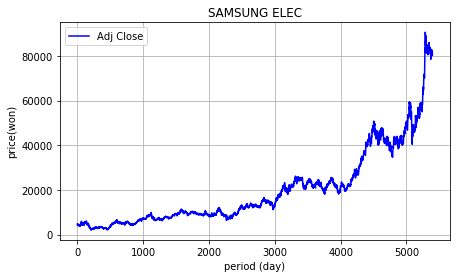

In [39]:
plt.figure(figsize=(7,4))

plt.title('SAMSUNG ELEC')
plt.ylabel('price(won)')
plt.xlabel('period (day)')
plt.grid()

plt.plot(raw_data['Adj Close'], label='Adj Close', color='b')
plt.legend()

plt.show()

# Data 평균,표준편차,최소,최대 등 표현해주는 describe

In [40]:
raw_data.describe()

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
count,5389.000000,5389.000000,5389.000000,5389.000000,5389.000000,5.389000e+03,5393.000000,5391.000000
mean,22801.887178,23043.991464,22559.285582,22801.909445,19920.044863,2.207838e+07,19934.224878,19925.585966
std,17736.201238,17906.827402,17572.109940,17733.296811,17322.636387,1.564053e+07,17313.297249,17292.697383
min,2540.000000,2760.000000,2420.000000,2730.000000,2117.926025,0.000000e+00,2164.473877,2179.989746
25%,9880.000000,9990.000000,9800.000000,9900.000000,7726.937988,1.185265e+07,7726.939453,7709.871631
50%,15760.000000,15940.000000,15560.000000,15800.000000,12808.596680,1.803935e+07,12802.806970,12809.314840
75%,29280.000000,29560.000000,29000.000000,29280.000000,24566.556640,2.771475e+07,24558.166020,24555.269140
max,90300.000000,96800.000000,89500.000000,91000.000000,90597.414060,1.642150e+08,90033.252600,89562.014060


#### volume( 거래량 )은 min값이 0

In [41]:
print(type(raw_data.isnull()))
print(raw_data.isnull().shape)
raw_data.isnull()

<class 'pandas.core.frame.DataFrame'>
(5395, 9)


,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
5390,False,False,False,False,False,False,False,False,False
5391,False,False,False,False,False,False,False,False,False
5392,False,False,False,False,False,False,False,False,False
5393,False,False,False,False,False,False,False,False,False


In [15]:
raw_data.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
3MA          2
5MA          4
dtype: int64

In [21]:
raw_data['Open'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
5390    False
5391    False
5392    False
5393    False
5394    False
Name: Open, Length: 5395, dtype: bool

In [43]:
raw_data[raw_data.isna()]

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
raw_data.loc[raw_data['Open'].isna()]

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
1304,2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,6989.931152,6910.412353
4513,2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN,49382.673830,49719.997070
4518,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN,49373.792970,49324.969730
4542,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,44927.763670,44190.302730
4755,2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN,40569.835940,40775.886720
5000,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN,49695.419920,49364.432620


In [45]:
raw_data['Volume'] = raw_data['Volume'].replace(0, np.nan)

In [46]:
for col in raw_data.columns:
    print(col)

Date
Open
High
Low
Close
Adj Close
Volume
3MA
5MA


In [47]:
for col in raw_data.columns:
    missing_rows = raw_data.loc[raw_data[col]==0].shape[0]
    print(col + ': '+str(missing_rows))

Date: 0
Open: 0
High: 0
Low: 0
Close: 0
Adj Close: 0
Volume: 0
3MA: 0
5MA: 0


In [48]:
raw_data.isnull().sum()

Date           0
Open           6
High           6
Low            6
Close          6
Adj Close      6
Volume       122
3MA            2
5MA            4
dtype: int64

In [49]:
raw_data = raw_data.dropna()

In [50]:
raw_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          0
5MA          0
dtype: int64

## Missing value가 있는 행들이 모두 사라짐

In [51]:
raw_data.shape

(5269, 9)

## Normalisation

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()

In [54]:
scale_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', '3MA','5MA','Volume']
# 정규화 대상이 되는 column들 

# Normalisation 수행

In [56]:
scaled_data = scaler.fit_transform(raw_data[scale_cols])
#scaler.fit_transform함수는 np.array를 뱉어주므로, describe로 확인하려면 pd.DataFrame으로 바꿔줘야함

In [58]:
print(type(scaled_data))

<class 'numpy.ndarray'>


In [59]:
scaled_data = pd.DataFrame(scaled_data, columns=scale_cols)

In [60]:
scaled_data.describe()
# Date를 제외한 모든 col들의 min, max값이 0, 1임을 확인할 수 있다.

,Open,High,Low,Close,Adj Close,3MA,5MA,Volume
count,5269.000000,5269.000000,5269.000000,5269.000000,5269.000000,5269.000000,5269.000000,5269.000000
mean,0.234290,0.218937,0.234651,0.230785,0.204295,0.205020,0.205679,0.137083
std,0.202292,0.190594,0.201992,0.201089,0.196200,0.197319,0.198212,0.093952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.087056,0.080604,0.087276,0.084400,0.066493,0.066012,0.066176,0.074025
50%,0.155196,0.144407,0.155489,0.152147,0.124504,0.124793,0.125218,0.111201
75%,0.307201,0.287325,0.307533,0.303047,0.255107,0.256476,0.257657,0.169895
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 학습을 위한 Input Date : feature_cols
# 정답 데이터 : label_cols

In [61]:
feature_cols = ['3MA', '5MA', 'Adj Close']
label_cols = ['Adj Close']

In [62]:
label_data = pd.DataFrame(scaled_data, columns=label_cols)
feature_data = pd.DataFrame(scaled_data, columns=feature_cols)
print(feature_data)
print(label_data)

           3MA       5MA  Adj Close
0     0.025192  0.025698   0.026655
1     0.025634  0.025094   0.026655
2     0.026163  0.025343   0.026217
3     0.025987  0.025503   0.026129
4     0.026163  0.026018   0.027181
...        ...       ...        ...
5264  0.895299  0.903144   0.885878
5265  0.894920  0.900854   0.890399
5266  0.897955  0.902457   0.900571
5267  0.899472  0.902228   0.890399
5268  0.897955  0.901083   0.885878

[5269 rows x 3 columns]
      Adj Close
0      0.026655
1      0.026655
2      0.026217
3      0.026129
4      0.027181
...         ...
5264   0.885878
5265   0.890399
5266   0.900571
5267   0.890399
5268   0.885878

[5269 rows x 1 columns]


In [63]:
label_np = label_data.to_numpy()
feature_np = feature_data.to_numpy()
# 딥러닝을 위해 pd.DataFrame에서 numpy로 변환

In [64]:
def make_sequence_dataset(feature, label, window_size):
    feature_list = []
    label_list = []
    
    for i in range(len(feature) - window_size):
        
        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])
    return np.array(feature_list), np.array(label_list)

In [65]:
window_size = 40

X, Y = make_sequence_dataset(feature_np, label_np, window_size)
print(X.shape, Y.shape)

(5229, 40, 3) (5229, 1)


# Train_data, Test_data 분리

In [66]:
x_train = X[0:-200]
y_train = Y[0:-200]

x_test = X[-200:]
y_test = Y[-200:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5029, 40, 3) (5029, 1)
(200, 40, 3) (200, 1)


In [67]:
model = Sequential()


In [68]:
model.add(LSTM(128, activation='tanh',input_shape=x_train[0].shape))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               67584     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 67,713
Trainable params: 67,713
Non-trainable params: 0
_________________________________________________________________


In [69]:
from tensorflow.keras.callbacks import EarlyStopping
# 조기 종료를 위함 ( loss값이 더이상 줄지 않을 경우  종료해버림)

In [70]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16, callbacks=[early_stop])

Epoch 1/100
315/315 [==============================] - 5s 13ms/step - loss: 0.0017 - mae: 0.0179 - val_loss: 9.9399e-04 - val_mae: 0.0216
Epoch 2/100
315/315 [==============================] - 3s 11ms/step - loss: 9.2266e-05 - mae: 0.0063 - val_loss: 6.1925e-04 - val_mae: 0.0170
Epoch 3/100
315/315 [==============================] - 3s 11ms/step - loss: 7.8501e-05 - mae: 0.0058 - val_loss: 6.1560e-04 - val_mae: 0.0172
Epoch 4/100
315/315 [==============================] - 3s 11ms/step - loss: 6.2641e-05 - mae: 0.0053 - val_loss: 4.7257e-04 - val_mae: 0.0152
Epoch 5/100
315/315 [==============================] - 3s 11ms/step - loss: 7.3572e-05 - mae: 0.0056 - val_loss: 6.0248e-04 - val_mae: 0.0184
Epoch 6/100
315/315 [==============================] - 3s 11ms/step - loss: 5.4898e-05 - mae: 0.0050 - val_loss: 3.9465e-04 - val_mae: 0.0140
Epoch 7/100
315/315 [==============================] - 3s 11ms/step - loss: 5.5608e-05 - mae: 0.0050 - val_loss: 3.2423e-04 - val_mae: 0.0126
Epoch 8/10

In [71]:
pred = model.predict(x_test)

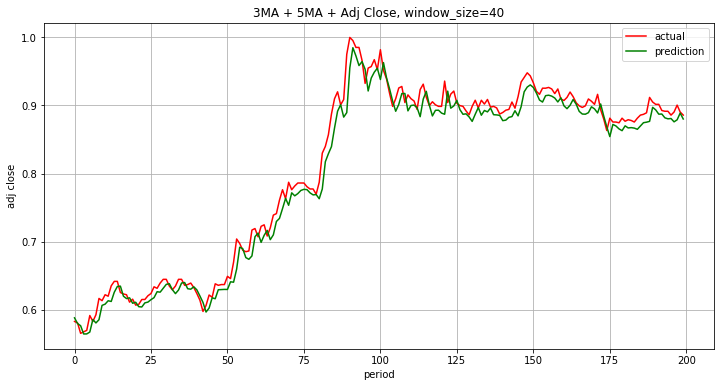

In [72]:
plt.figure(figsize=(12,6))
plt.title('3MA + 5MA + Adj Close, window_size=40')
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(y_test, label='actual', color = 'red')
plt.plot(pred, label='prediction', color = 'green')
plt.grid()
plt.legend()

plt.show()